# Import Libraries

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import pandas as pd
import numpy as np
import os
import librosa
import tensorflow as tf
import librosa.display
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
# import tensorflow.keras.layers as layers
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score

In [2]:
print(tf.test.gpu_device_name())

/device:GPU:0


In [3]:
from IPython.display import Audio

In [4]:
import torchaudio

In [5]:
import torchvision

# Audio Visualizations

In [6]:
def plot_audio(path):
    waveform, sample_rate = torchaudio.load(path)

    print("Shape of waveform: {}".format(waveform.size()))
    print("Sample rate of waveform: {}".format(sample_rate))

    plt.figure()
    plt.plot(waveform.t().numpy())
    plt.show()
    Audio(waveform.numpy(), rate=sample_rate)
    return waveform, sample_rate

In [7]:
def show_spectrogram(path):
    waveform, sample_rate = torchaudio.load(path)
    spectrogram = torchaudio.transforms.Spectrogram()(waveform)
    print("\nShape of spectrogram: {}".format(spectrogram.size()))

    plt.figure(figsize = (12, 6))
    plt.imshow(
        spectrogram.log2()[0, :, :].numpy(),
        cmap='gray',
        vmin = -40,
        vmax = 15
    )
    plt.title("Spectrogram")
    plt.xlabel('Time')
    plt.ylabel('Frequency bins')
    plt.show()

Shape of waveform: torch.Size([1, 179200])
Sample rate of waveform: 16000


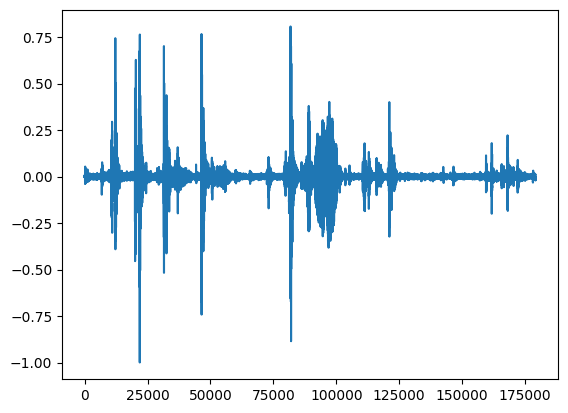


Shape of spectrogram: torch.Size([1, 201, 897])


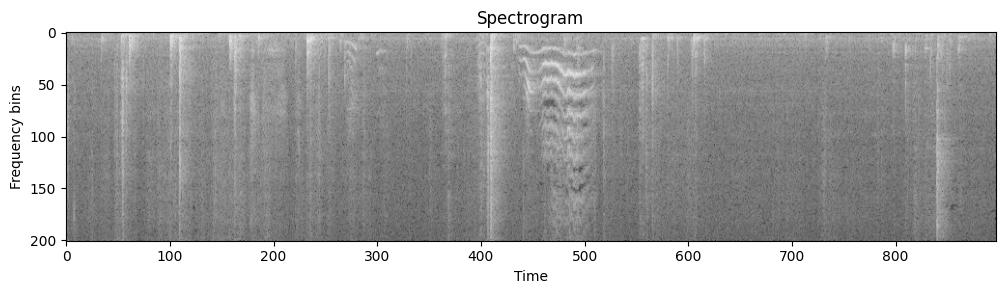

In [11]:
path = '/content/drive/MyDrive/cats/archive/cats_dogs/cat_1.wav'
plot_audio(path = path)
show_spectrogram(path = path)

Shape of waveform: torch.Size([1, 54649])
Sample rate of waveform: 16000


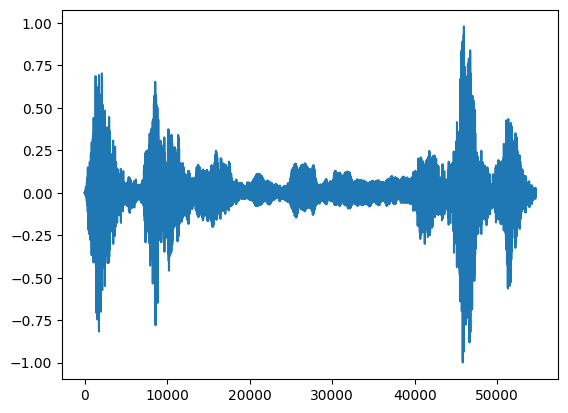


Shape of spectrogram: torch.Size([1, 201, 274])


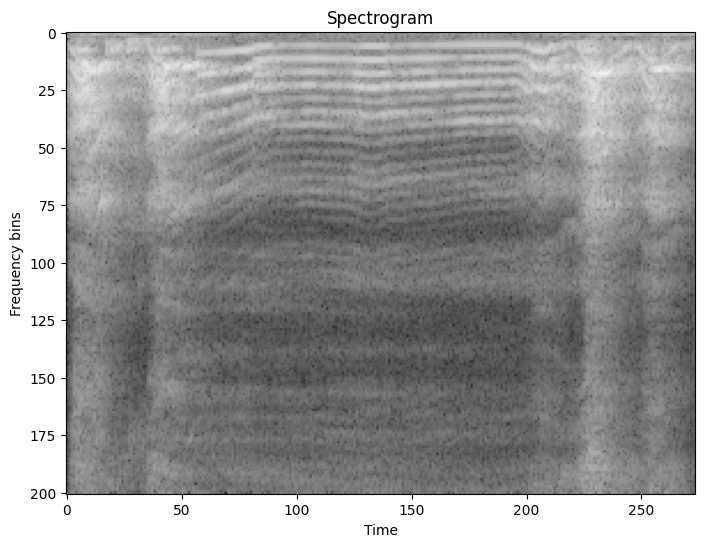

In [14]:
path = '/content/drive/MyDrive/cats/archive/cats_dogs/train/dog/dog_barking_30.wav'
plot_audio(path = path)
show_spectrogram(path = path)

# **Prepare data**

In [15]:
# List the wav files
ROOT_DIR = '/content/drive/MyDrive/cats/archive/cats_dogs/'
X_path = os.listdir(ROOT_DIR)
y = [0 if 'cat' in f else 1 for f in X_path]  # change y to int values

# Split train and test
X_train, X_test, y_train, y_test = train_test_split(X_path, y, test_size=0.33)

print("in X, there is {} cats and {} dogs".format(len(y) - sum(y), sum(y)))
print("in X_train, there is {} cats and {} dogs".format(len(y_train) - sum(y_train), sum(y_train)))
print("in X_test, there is {} cats and {} dogs".format(len(y_test) - sum(y_test), sum(y_test)))

in X, there is 168 cats and 115 dogs
in X_train, there is 119 cats and 70 dogs
in X_test, there is 49 cats and 45 dogs


In [44]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import scipy
import scipy.io.wavfile as wavfile
import sklearn
import sklearn.metrics
import seaborn as sns
import random
import math
import sklearn.utils
import sklearn.metrics
import matplotlib.pyplot as plt
import glob
import os
import scipy
import scipy.signal
import tensorflow as tf
from imblearn.over_sampling import RandomOverSampler
import IPython

In [66]:
WAVE_FOLDER = '/content/drive/MyDrive/cats/archive/cats_dogs'
FRAMERATE = 16000
MAX_WAV_SAMPLES = 20*FRAMERATE
DOWNSAMPLING_SCALE = 1

df = pd.read_csv("/content/drive/MyDrive/cats/archive/train_test_split.csv")
test_cat = df[['test_cat']].dropna().rename(index=str, columns={"test_cat": "file"}).assign(label=0)
test_dog = df[['test_dog']].dropna().rename(index=str, columns={"test_dog": "file"}).assign(label=1)
train_cat = df[['train_cat']].dropna().rename(index=str, columns={"train_cat": "file"}).assign(label=0)
train_dog = df[['train_dog']].dropna().rename(index=str, columns={"train_dog": "file"}).assign(label=1)

test_df = pd.concat([test_cat, test_dog]).reset_index(drop=True)
train_df = pd.concat([train_cat, train_dog]).reset_index(drop=True)

In [85]:
train_df

,file,label
0,cat_99.wav,0
1,cat_54.wav,0
2,cat_34.wav,0
3,cat_132.wav,0
4,cat_124.wav,0
...,...,...
174,dog_barking_9.wav,1
175,dog_barking_111.wav,1
176,dog_barking_67.wav,1
177,dog_barking_108.wav,1


In [86]:
random_oversampler = RandomOverSampler()
idx = np.arange(0, len(train_df)).reshape(-1, 1)
idx_sampled, _ = random_oversampler.fit_resample(idx, train_df['label'])
train_files, train_labels = train_df.iloc[idx_sampled.flatten()]['file'].values, train_df.iloc[idx_sampled.flatten()]['label'].values
train_files, train_labels = sklearn.utils.shuffle(train_files, train_labels)
test_files, test_labels = test_df['file'].values, test_df['label'].values

In [87]:
# test training and test files

print('Train files:', train_files[:10])
print('Train labels:', train_labels[:10])
print('Test files:', test_files[:10])
print('Test labels:', test_labels[:10])


Train files: ['dog_barking_2.wav' 'dog_barking_81.wav' 'cat_80.wav'
 'dog_barking_59.wav' 'cat_164.wav' 'cat_44.wav' 'cat_36.wav'
 'dog_barking_76.wav' 'dog_barking_46.wav' 'dog_barking_86.wav']
Train labels: [1 1 0 1 0 0 0 1 1 1]
Test files: ['cat_22.wav' 'cat_116.wav' 'cat_155.wav' 'cat_58.wav' 'cat_77.wav'
 'cat_144.wav' 'cat_49.wav' 'cat_38.wav' 'cat_5.wav' 'cat_2.wav']
Test labels: [0 0 0 0 0 0 0 0 0 0]


# THE MODELING

In [ ]:
def fit_generator(train_files, train_labels, wavs_per_batch=20, augments=5):
    while True:
        maxidx = len(train_files)
        for i in range(0, maxidx, wavs_per_batch):
            waves_batch = []
            labels_batch = []
            for j in range(i, min(maxidx, i+wavs_per_batch)):
                file, label = train_files[j], train_labels[j]
                wave_raw = wavfile.read(os.path.join(WAVE_FOLDER, file))[1]
                wave_raw = wave_raw/np.std(wave_raw)
                length = len(wave_raw)
                waves_batch.append(np.pad(wave_raw, pad_width=((0, MAX_WAV_SAMPLES - length)), mode='wrap'))
                labels_batch.append(label)
                for _ in range(augments):
                    wave_rotated = np.roll(wave_raw, random.randint(0, length))
                    while random.choice([True, False]):
                        wave_rotated += np.roll(wave_raw, random.randint(0, length))
                    wave = np.pad(wave_rotated, pad_width=((0, MAX_WAV_SAMPLES - length)), mode='wrap')
                    #wave = scipy.signal.decimate(wave, DOWNSAMPLING_SCALE)
                    waves_batch.append(wave)
                    labels_batch.append(label)
            yield np.array(waves_batch), np.array(labels_batch)

In [88]:
next(fit_generator(train_files, train_labels))

(array([[-0.04493662, -0.11089862, -0.14511642, ..., -0.22550761,
         -0.18180778, -0.12574008],
        [-2.77122883, -2.3511333 , -1.90918785, ..., -0.23045476,
         -0.19829828, -0.15501072],
        [ 0.2696197 , -0.29394319, -1.05374307, ..., -2.5040827 ,
         -2.58488616, -2.57993901],
        ...,
        [-0.5569183 , -0.47525943, -0.45261656, ..., -0.54150188,
         -1.3903687 , -2.40929794],
        [-0.99435932, -0.74360155, -0.92209483, ..., -3.93094712,
         -2.41869233, -0.79370493],
        [ 0.92354012,  0.66676032, -0.01927053, ...,  4.36742462,
          4.42499532,  4.34791321]]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
        1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
   

Generate what'll be the official train/test split


In [81]:
def fit_generator(train_files, train_labels, wavs_per_batch=20, augments=5):
    while True:
        maxidx = len(train_files)
        for i in range(0, maxidx, wavs_per_batch):
            waves_batch = []
            labels_batch = []
            for j in range(i, min(maxidx, i+wavs_per_batch)):
                file, label = train_files[j], train_labels[j]
                wave_raw = wavfile.read(os.path.join(WAVE_FOLDER, file))[1]
                wave_raw = wave_raw/np.std(wave_raw)
                length = len(wave_raw)
                waves_batch.append(np.pad(wave_raw, pad_width=((0, MAX_WAV_SAMPLES - length)), mode='wrap'))
                labels_batch.append(label)
                for _ in range(augments):
                    wave_rotated = np.roll(wave_raw, random.randint(0, length))
                    while random.choice([True, False]):
                        wave_rotated += np.roll(wave_raw, random.randint(0, length))
                    wave = np.pad(wave_rotated, pad_width=((0, MAX_WAV_SAMPLES - length)), mode='wrap')
                    #wave = scipy.signal.decimate(wave, DOWNSAMPLING_SCALE)
                    waves_batch.append(wave)
                    labels_batch.append(label)
            yield np.array(waves_batch), np.array(labels_batch)

def validate_generator(test_files, test_labels, wavs_per_batch=20):
    while True:
        maxidx = len(test_files)
        for i in range(0, maxidx, wavs_per_batch):
            waves_batch = []
            labels_batch = []
            for j in range(i, min(maxidx, i+wavs_per_batch)):
                file, label = test_files[j], test_labels[j]
                wave_raw = wavfile.read(os.path.join(WAVE_FOLDER, file))[1]
                wave_raw = wave_raw/np.std(wave_raw)
                length = len(wave_raw)
                left = 0
                right = MAX_WAV_SAMPLES - left - length
                wave = np.pad(wave_raw, pad_width=((left, right)), mode='wrap')
                #wave = scipy.signal.decimate(wave, DOWNSAMPLING_SCALE)
                waves_batch.append(wave)
                labels_batch.append(label)
            yield np.array(waves_batch), np.array(labels_batch)

def steps_per_epoch(wavs_per_epoch, wavs_per_batch):
    return int(math.ceil(wavs_per_epoch/wavs_per_batch))

# Training

In [91]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Reshape((MAX_WAV_SAMPLES//DOWNSAMPLING_SCALE,1), input_shape=(MAX_WAV_SAMPLES//DOWNSAMPLING_SCALE,)))
for i in range(14):
    model.add(tf.keras.layers.Conv1D(32, kernel_size=5,
                                     padding='same',
                                     activation='relu',
                                     kernel_initializer=tf.keras.initializers.Orthogonal(),
                                    ))
    model.add(tf.keras.layers.MaxPooling1D(pool_size=3, strides=2))
    model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(2, activation='softmax'))

model.compile(optimizer=tf.keras.optimizers.Adam(0.0005),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy']
             )

In [75]:
# Assuming your model is already defined and compiled
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_2 (Reshape)         (None, 320000, 1)         0         
                                                                 
 conv1d_54 (Conv1D)          (None, 320000, 32)        192       
                                                                 
 max_pooling1d_28 (MaxPooli  (None, 159999, 32)        0         
 ng1D)                                                           
                                                                 
 batch_normalization_41 (Ba  (None, 159999, 32)        128       
 tchNormalization)                                               
                                                                 
 conv1d_55 (Conv1D)          (None, 159999, 32)        5152      
                                                                 
 max_pooling1d_29 (MaxPooli  (None, 79999, 32)        

In [94]:
EPOCHS=15
WAVS_PER_BATCH = 3
AUGMENTS = 10
# Train the model
model.fit(fit_generator(train_files, train_labels, WAVS_PER_BATCH, AUGMENTS),
                    steps_per_epoch=steps_per_epoch(len(train_files), WAVS_PER_BATCH),
                    epochs = EPOCHS,
                    validation_data=validate_generator(test_files, test_labels, WAVS_PER_BATCH),
                    validation_steps=steps_per_epoch(len(test_files), WAVS_PER_BATCH),
                    verbose=2)

Epoch 1/15
77/77 - 55s - loss: 0.4309 - accuracy: 0.8194 - val_loss: 0.4134 - val_accuracy: 0.8571 - 55s/epoch - 713ms/step
Epoch 2/15
77/77 - 55s - loss: 0.4033 - accuracy: 0.8407 - val_loss: 0.4204 - val_accuracy: 0.7653 - 55s/epoch - 715ms/step
Epoch 3/15
77/77 - 56s - loss: 0.3594 - accuracy: 0.8542 - val_loss: 0.1584 - val_accuracy: 0.9388 - 56s/epoch - 722ms/step
Epoch 4/15
77/77 - 56s - loss: 0.3379 - accuracy: 0.8628 - val_loss: 0.2525 - val_accuracy: 0.9286 - 56s/epoch - 732ms/step
Epoch 5/15
77/77 - 56s - loss: 0.3182 - accuracy: 0.8648 - val_loss: 0.1391 - val_accuracy: 0.9490 - 56s/epoch - 725ms/step
Epoch 6/15
77/77 - 56s - loss: 0.3049 - accuracy: 0.8652 - val_loss: 0.1325 - val_accuracy: 0.9388 - 56s/epoch - 726ms/step
Epoch 7/15
77/77 - 56s - loss: 0.2985 - accuracy: 0.8779 - val_loss: 0.0979 - val_accuracy: 0.9694 - 56s/epoch - 730ms/step
Epoch 8/15
77/77 - 56s - loss: 0.2683 - accuracy: 0.8870 - val_loss: 0.1030 - val_accuracy: 0.9490 - 56s/epoch - 726ms/step
Epoch 9/

<ipython-input-95-115aaf3e2b3f>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predicted_probs = model.predict_generator(


0.9489795918367347


<ipython-input-95-115aaf3e2b3f>:6: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  sns.heatmap(sklearn.metrics.confusion_matrix(predicted_classes, test_labels), annot=True);predicted_probs = model.predict_generator(


0.9489795918367347


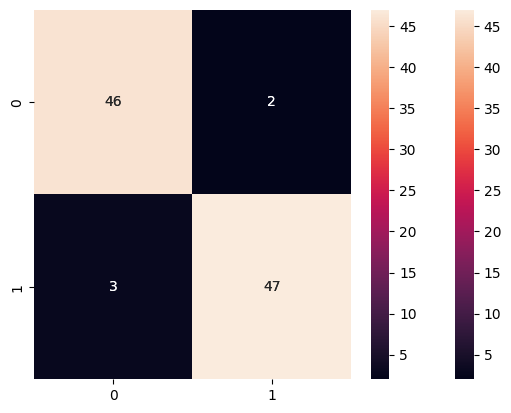

In [95]:
predicted_probs = model.predict_generator(
    validate_generator(test_files, test_labels, WAVS_PER_BATCH),
    steps=steps_per_epoch(len(test_files), WAVS_PER_BATCH))
predicted_classes = np.argmax(predicted_probs, axis=1)
print(sklearn.metrics.accuracy_score(predicted_classes, test_labels))
sns.heatmap(sklearn.metrics.confusion_matrix(predicted_classes, test_labels), annot=True);predicted_probs = model.predict_generator(
    validate_generator(test_files, test_labels, WAVS_PER_BATCH),
    steps=steps_per_epoch(len(test_files), WAVS_PER_BATCH))
predicted_classes = np.argmax(predicted_probs, axis=1)
print(sklearn.metrics.accuracy_score(predicted_classes, test_labels))
sns.heatmap(sklearn.metrics.confusion_matrix(predicted_classes, test_labels), annot=True);